In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
import matplotlib.colors as col
from matplotlib.colors import Normalize
%matplotlib notebook

# Take 4 samples (sample size=3650) from 4 normal distributions with different mean and sd for years from 1992 to 1995, and put them in a DataFrame.

In [2]:
np.random.seed (12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
                   
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908



# Plot bars for each yr and the 95% confidence interval of mean on their top.
# Different noraml distributions have different length of CI, let's check one x-axis value where the color of the bar is based on the amount of data covered. 
# Dark blue for the distribution that x-axis value is smaller then its CI, to dark red if the value is bigger than the CI, white if the value is in the CI which means cover percentage of data.

<IPython.core.display.Javascript object>


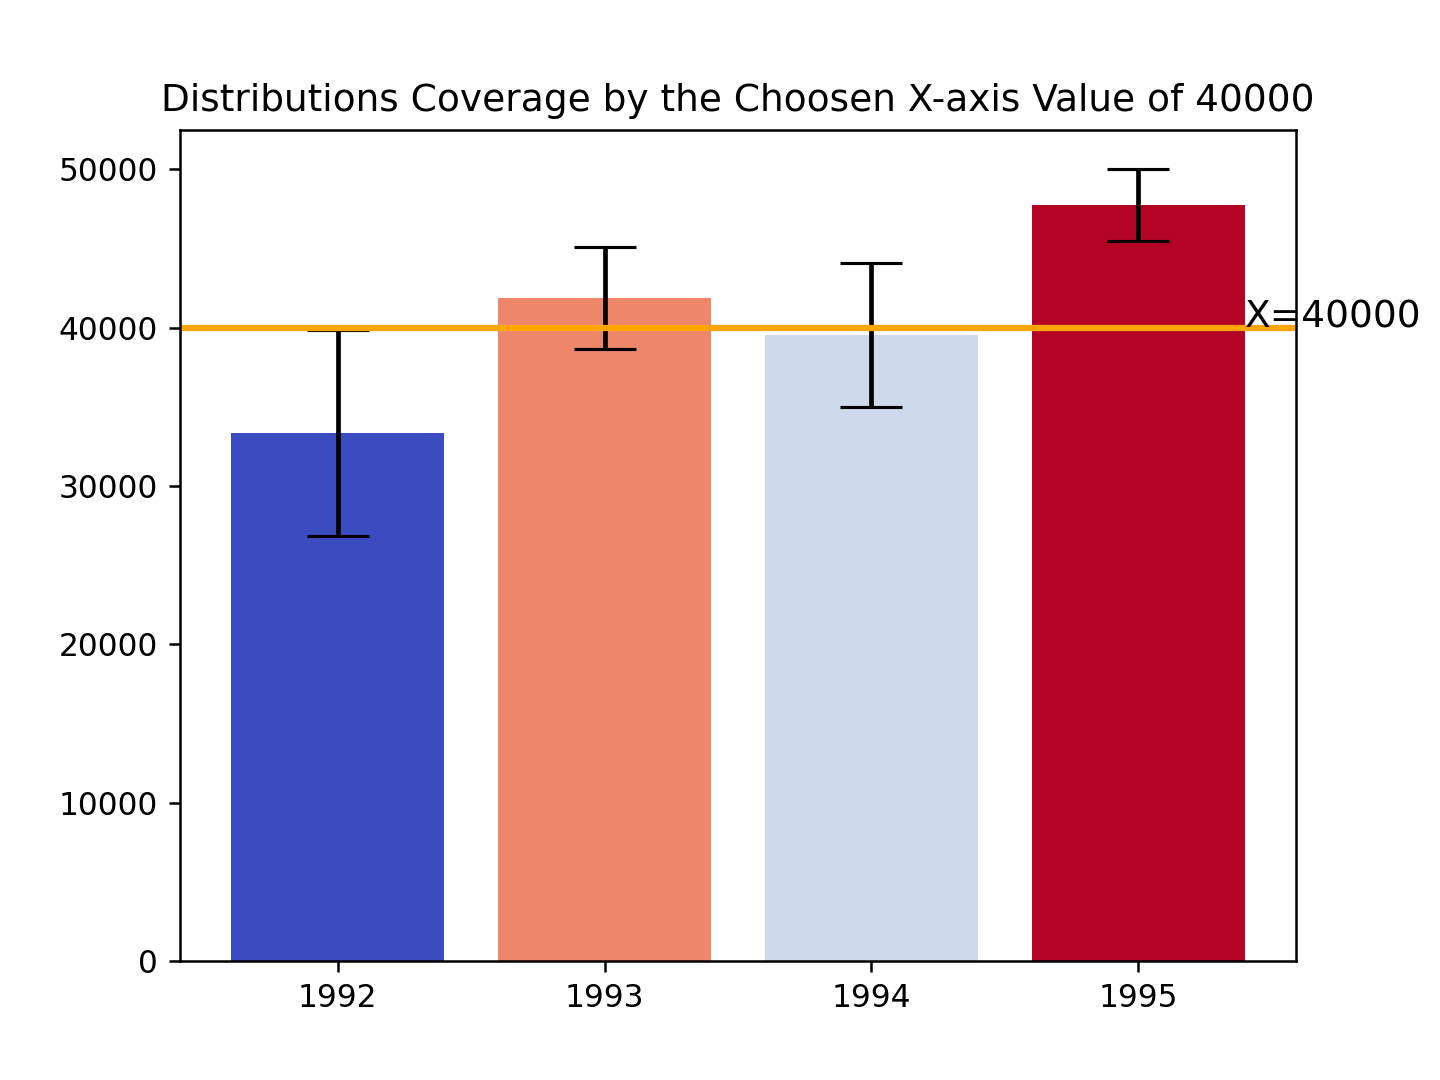

In [6]:
n=df.shape[1]
df['Mean']=df.mean(axis=1)
df['SD']=df.std (axis=1)
z_value=stats.norm.ppf(1-0.05/2)

#calculate marginal error
marginal_error = df['SD']/np.sqrt(n) * z_value

#confidence Interval
CI=[stats.norm.interval (.95, loc=m, scale=se) for m,se in zip(df['Mean'], df['SD']/np.sqrt(n))]

#y axis value of interest 
Y=40000


#check confidence interval whether contains y axis value
def check (Y, CI):
    if Y < np.min(CI):
        return 1.0
    elif Y > np.max(CI):
        return 0.0
    else:
        return ((np.max(CI)-Y)/ (np.max(CI)-np.min(CI)))
    
    
# p(min of CI for each year > Y)
prob = [ check (Y, ci) for ci in CI]


# set color mappable
fig= plt.bar(df.index, df['Mean'], yerr=marginal_error, capsize=10, color=cm.coolwarm(prob))
plt.xticks (df.index, (1992,1993,1994,1995))
plt.gca().set_title('Distributions Coverage by the Choosen X-axis Value of {}'. format(Y))






# plot horizontal line for Y with constant value
hor_line=plt.axhline(Y, color='Orange', linewidth=2)


# Adding a textbox for Y
Ytext=plt.text (1995.40, Y, 'X=%d' %Y, fontsize=12)



# let's challenge the x-axis values to know which are most likely to be representative, by adding interactivity to the plot.

In [5]:
#Add interactivity
def onclick(event):
    plt.cla()
    y=event.ydata
    plt.gca().set_title('Distributions Coverage by the Choosen X-axis Value of {}'.format(y))
    
    
    def check (y, CI):
        if y < np.min(CI):
            return 1.0
        elif y > np.max(CI):
            return 0.0
        else:
            return ((np.max(CI)-y)/ (np.max(CI)-np.min(CI)))
    
   
    prob = [ check (y, ci) for ci in CI]

    # set color mappable by matplotlib.cm.coolwarm()
    fig= plt.bar(df.index, df['Mean'], yerr=marginal_error, capsize=10, color=cm.coolwarm(prob))
    plt.xticks (df.index, (1992,1993,1994,1995))
   

    # plot horizontal line
    hor_line=plt.axhline(y, color='Orange', linewidth=2)
    # Adding a textbox for event.ydata
    Ytext=plt.text (1995.40, y, 'X=%d' %y, fontsize=12)

    
#connect the event to the event listener        
plt.gcf().canvas.mpl_connect ('button_press_event',onclick)

7